In [1]:
import requests
import sys
import pandas as pd
import numpy as np
from scipy import sparse
from io import StringIO
import networkscience as ns
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# reading all datasets
country19_df = pd.read_csv('data\Erasmus19.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country18_df = pd.read_csv('data\Erasmus18.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country17_df = pd.read_csv('data\Erasmus17.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country16_df = pd.read_csv('data\Erasmus16.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country15_df = pd.read_csv('data\Erasmus15.csv', sep=';',low_memory=False, header=0, encoding='utf8')
country14_df = pd.read_csv('data\Erasmus14.csv', sep=';',low_memory=False, header=0, encoding='utf8')

# merging all datasets
df = country19_df.append(country18_df)
df = df.append(country17_df)
df = df.append(country16_df)
df = df.append(country15_df)
df = df.append(country14_df)

In [3]:
# reply = requests.get('https://gitlab.com/data.europa.eu/data-provider-repository/-/raw/master/dg-eac/2021.05.11%20KA1%20mobilities%20eligible%20finalised%20started%20in%202018.csv?inline=false')
# reply.encoding = 'utf-8'
# csv_data = reply.text
# df = pd.read_csv(StringIO(csv_data), sep=';',low_memory=False, header=0)

for i, name in enumerate(df.columns):
    print(i, name)
df.drop(columns=['GroupLeader', 'Sending Organisation Erasmus Code', 'Receiving Organisation Erasmus Code'], inplace=True)
c_df = df.copy() # we will use it for later (country network)

0 Project Reference
1 Academic Year
2 Mobility Start Month
3 Mobility End Month
4 Mobility Duration
5 Activity (mob)
6 Field of Education
7 Participant Nationality
8 Education Level
9 Participant Gender
10 Participant Profile
11 Special Needs
12 Fewer Opportunities
13 GroupLeader
14 Participant Age
15 Sending Country Code
16 Sending City
17 Sending Organization
18 Sending Organisation Erasmus Code
19 Receiving Country Code
20 Receiving City
21 Receiving Organization
22 Receiving Organisation Erasmus Code
23 Participants


In [4]:
pd.options.display.max_columns=21
display(df)

,Project Reference,Academic Year,Mobility Start Month,Mobility End Month,Mobility Duration,Activity (mob),Field of Education,Participant Nationality,Education Level,Participant Gender,Participant Profile,Special Needs,Fewer Opportunities,Participant Age,Sending Country Code,Sending City,Sending Organization,Receiving Country Code,Receiving City,Receiving Organization,Participants
0,2016-3-EE01-KA105-034520,2019-2020,2019-03,2019-04,33.0,European Voluntary Service - Partner Countries,? Unknown ?,EE,??? - ? Unknown ?,Female,Learner,No,No,18,EE,TALLINN,MTÜ NOORTEVAHETUSE ARENGU ÜHING ESTYES,RU,Nizhny Novgorod,Interregional youth social movement of support...,1
1,2016-3-UK01-KA105-035288,2019-2020,2019-02,2019-03,56.0,European Voluntary Service - Partner Countries,? Unknown ?,IT,??? - ? Unknown ?,Male,Learner,No,Yes,29,IT,TRAPPETO,CESIE,UK,Cardiff,Language Academy Wales,1
2,2017-1-AT01-KA101-034705,2019-2020,2019-04,2019-04,6.0,Structured Courses/Training Events,Languages,AT,??? - ? Unknown ?,Female,Staff,No,No,39,AT,Hollabrunn,HTL Für Lebensmitteltechnologie-Lebensmittelsi...,EL,Heraklion,Institut für europäische Lehrerfortbildung UG ...,1
3,2017-1-AT01-KA101-034727,2019-2020,2019-02,2019-02,15.0,Structured Courses/Training Events,Teacher training with subject specialization,AT,??? - ? Unknown ?,Female,Staff,No,No,27,AT,Weiz,BHAK/BHAS Weiz,IE,Dublin,Atlantic Language Dublin,1
4,2017-1-AT01-KA101-034774,2019-2020,2019-02,2019-02,5.0,Structured Courses/Training Events,Education,AT,??? - ? Unknown ?,Female,Staff,No,No,26,AT,Linz,Bundesbildungsanstalt für Elementarpädagogik,MT,St.Julian's,Executive Training Institute Ltd.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235409,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,SI,??? - ? Unknown ?,Male,Staff,No,No,-1,SI,Slovenj Gradec,JZ Spotur,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235410,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,SI,??? - ? Unknown ?,Male,Staff,No,No,27,SI,Slovenj Gradec,JZ Spotur,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235411,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,TR,??? - ? Unknown ?,Female,Staff,No,No,25,TR,Istanbul,Toplum Gonulluleri Vakfi,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1
235412,2014-3-SE02-KA105-001055,2014-2015,2014-07,2014-07,9.0,Mobility of youth workers - Partner Countries,? Unknown ?,UA,??? - ? Unknown ?,Female,Staff,No,No,22,UA,Kyiv,All-Ukrainian Association for Youth Co-operati...,GE,Tbilisi,"Non Formal Education Youth Centre ""Sunny House""",1


In [5]:
mobility_df = df[df[df.columns[10]]=='Learner']
mobility_df = mobility_df[mobility_df['Activity (mob)'].str.contains('Student')]
mobility_df = mobility_df[~mobility_df['Activity (mob)'].str.contains('traineeship')]
mobility_df = mobility_df.loc[:, df.columns[np.array((16, 19, 20, 5, 15, 18))]]
print((mobility_df['Receiving Organization'].nunique()))
print((mobility_df['Sending Organization'].nunique()))

5410
6505


In [6]:
mobility_df['Sending Organization'] = mobility_df['Sending Organization'].str.upper()
mobility_df['Receiving Organization'] = mobility_df['Receiving Organization'].str.upper()

print('Number of Receiving Universities: ',(mobility_df['Receiving Organization'].nunique()))
print('Number of Sending Universities: ',(mobility_df['Sending Organization'].nunique()))
mobility_df

Number of Receiving Universities:  5220
Number of Sending Universities:  6253


,Sending Organization,Receiving Organization,Participants,Activity (mob),Sending City,Receiving City
276,CHINA FOREIGN AFFAIRS UNIVERSITY,DIPLOMATISCHE AKADEMIE WIEN,1,Student mobility for Studies To/From Partner C...,Beijing,WIEN
277,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,SOUTHERN FEDERAL UNIVERSITY,1,Student mobility for Studies To/From Partner C...,Wien,ROSTOV ON DON
278,SOUTHERN FEDERAL UNIVERSITY,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,ROSTOV ON DON,Wien
279,FEDERAL STATE BUDGET EDUCATIONAL INSTITUTION O...,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,SAINT PETERSBURG,Wien
280,SOUTHERN FEDERAL UNIVERSITY,FACHHOCHSCHULE DES BFI WIEN GESELLSCHAFT M.B.H.,1,Student mobility for Studies To/From Partner C...,ROSTOV ON DON,Wien
...,...,...,...,...,...,...
214990,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO
214991,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO
214992,OXFORD BROOKES UNIVERSITY,UNIVERSIDAD DE ZARAGOZA,1,Student mobility for studies between Programme...,OXFORD,ZARAGOZA
214993,OXFORD BROOKES UNIVERSITY,POLITECNICO DI TORINO,1,Student mobility for studies between Programme...,OXFORD,TORINO


In [7]:
nodes = np.array(list(set.union(set(mobility_df.loc[:, mobility_df.columns[0]]), set(mobility_df.loc[:, mobility_df.columns[1]]))))
node_position = {}
for i, name in enumerate(nodes):
    node_position[name] = i
nodes_df = pd.DataFrame({'Nodes': nodes})
mobility_df['SendId'] = (np.array(list(map(lambda x: node_position[x], mobility_df['Sending Organization']))))
mobility_df['RecId']= (np.array(list(map(lambda x: node_position[x], mobility_df['Receiving Organization']))))
# Adjacency matrix
adj_matrix_crs = sparse.csr_matrix((nodes.size, nodes.size),dtype=int)
adj_matrix_csc = sparse.csc_matrix((nodes.size, nodes.size),dtype=int)

In [8]:
mobility_serie = mobility_df.groupby(['SendId', 'RecId']).sum()
row = np.array(mobility_serie.index.get_level_values(1).tolist())
col = np.array(mobility_serie.index.get_level_values(0).tolist())
val = mobility_serie.values
adj_matrix_crs = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))

# cercasi 70 Gb di ram, no perditempo
# ns.visualize_adj(adj_matrix_crs)

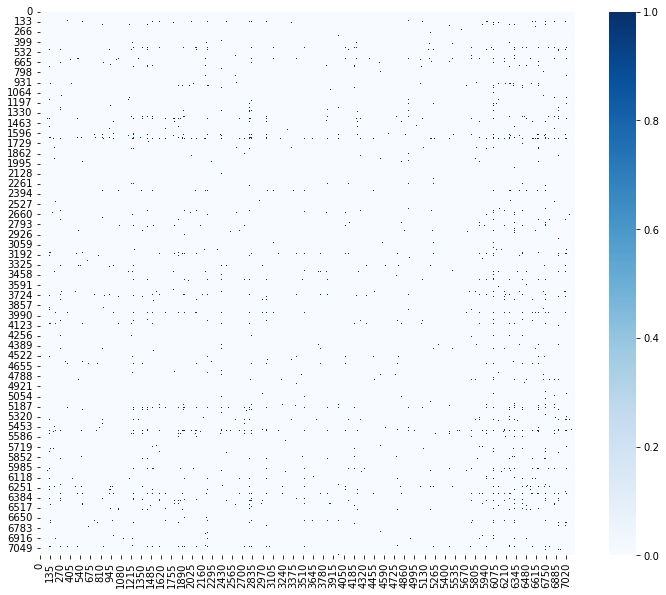

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
a_adj = adj_matrix_crs.toarray()
a_adj[a_adj>1] = 1
sns.heatmap(a_adj, cmap="Blues", ax=ax)
plt.show()

In [10]:
mobility_df.rename({'Sending Organization': 'source','Receiving Organization': 'target', 'Participants':'weight'},axis=1, inplace=True)
uni_cities = mobility_df.copy()
adj_matrix_crs, mobility_df, nodes_df = ns.keep_giant(ns.find_components(adj_matrix_crs, nodes_df), mobility_df)

### Degree distribution

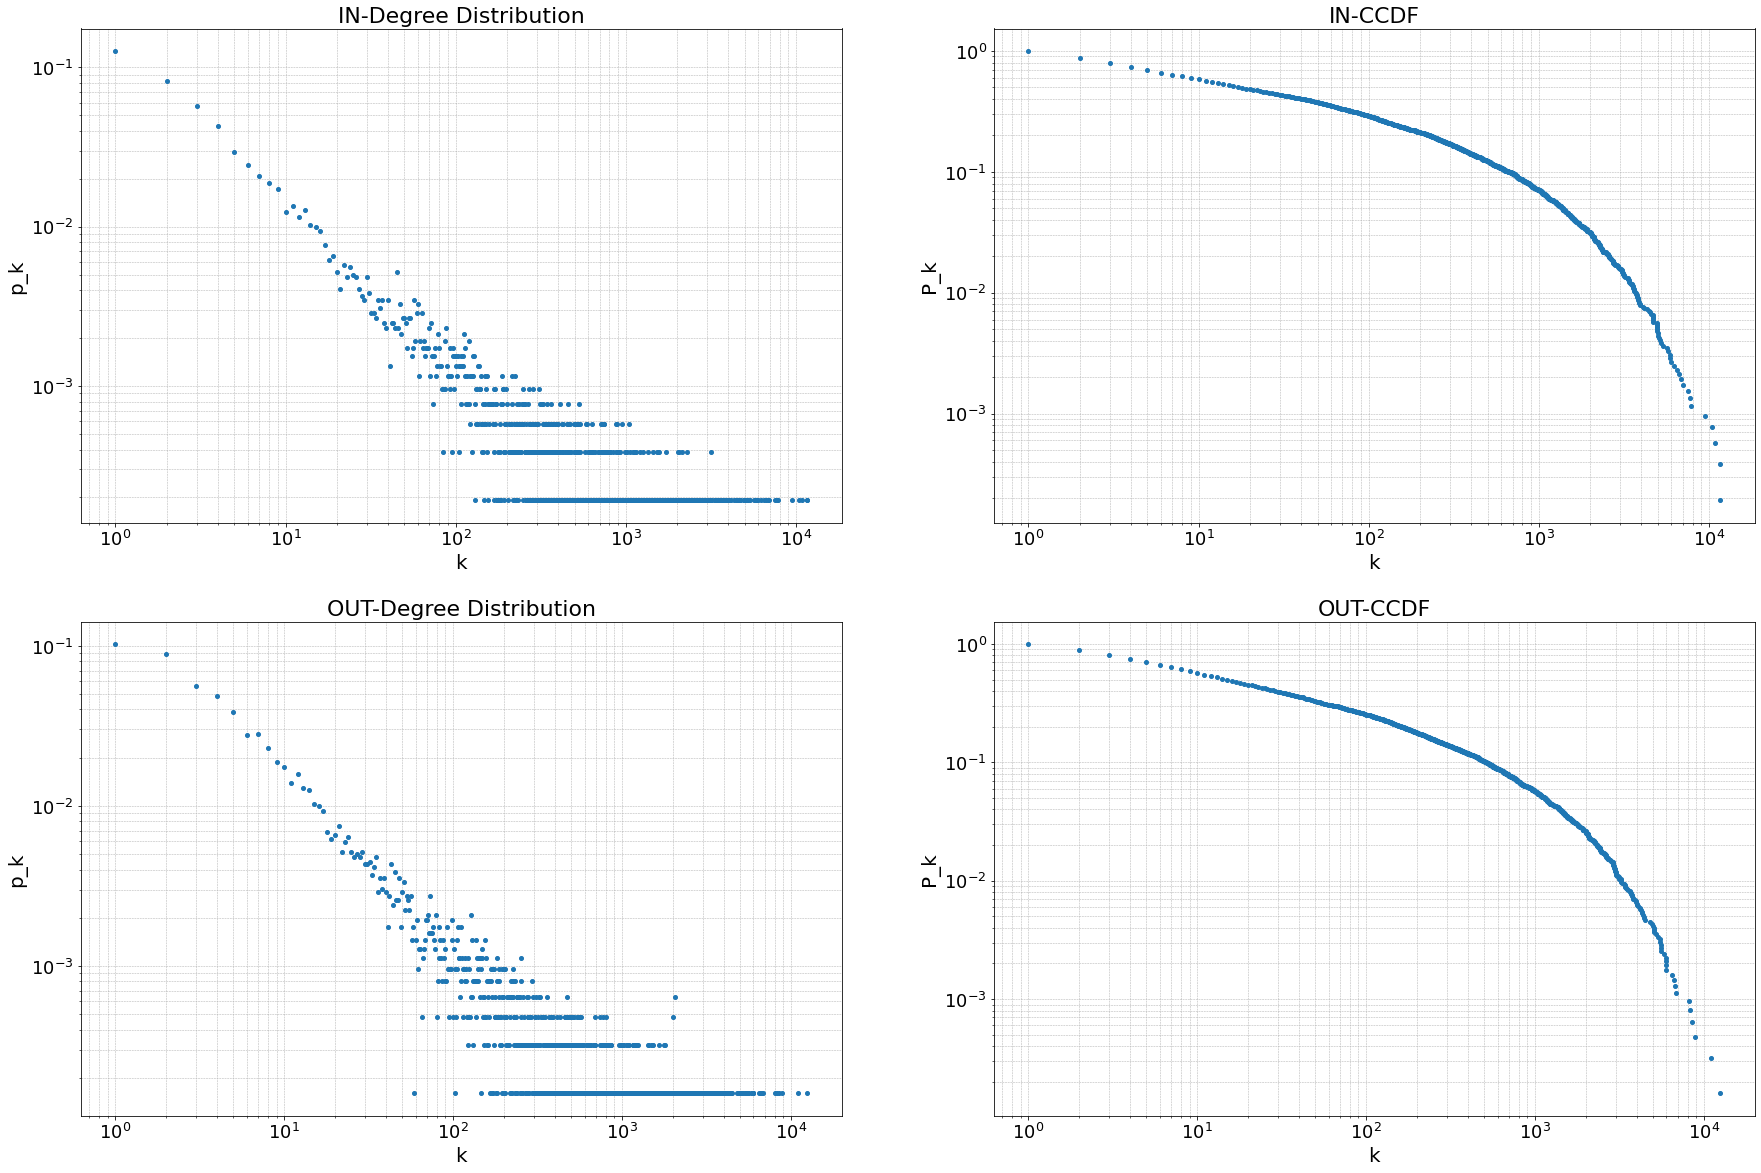

Top 10 for in degree


,Nodes,in degree
6387,UNIVERSITAT DE VALENCIA,11611
3861,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,11540
3106,UNIVERSIDAD DE GRANADA,10809
867,UNIVERSIDADE DE LISBOA,10424
4419,UNIVERSIDAD COMPLUTENSE DE MADRID,9414
5990,UNIVERSITAT POLITECNICA DE VALENCIA,7854
6023,UNIVERZA V LJUBLJANI,7762
5322,KATHOLIEKE UNIVERSITEIT LEUVEN,7487
3378,UNIVERSIDAD DE SEVILLA,6978
4048,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,6818


Top 10 for out degree


,Nodes,out degree
3861,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,12477
3106,UNIVERSIDAD DE GRANADA,11026
6387,UNIVERSITAT DE VALENCIA,8866
4419,UNIVERSIDAD COMPLUTENSE DE MADRID,8467
2554,UNIVERSITA DEGLI STUDI DI PADOVA,8302
5478,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,8102
5322,KATHOLIEKE UNIVERSITEIT LEUVEN,6867
1505,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,6700
6716,UNIVERSITA DEGLI STUDI DI TORINO,6664
1241,UNIVERSIDAD POLITECNICA DE MADRID,6446


In [11]:
scores = ns.degree_disribution(adj_matrix_crs, nodes_df, print_graph=True)
ns.display_top_n(scores, 10, 'in degree')
ns.display_top_n(scores, 10, 'out degree')

### Estimating $\gamma$ 

In [12]:
from collections import Counter
from statistics import mean

d_in = scores['in degree']
d_in = d_in[d_in>0]
d_out = scores['out degree']
d_out = d_out[d_out>0]
kmin = 100
d2_in = d_in[d_in>kmin]
d2_out = d_out[d_out>kmin]

sorted_d = sorted(d_in)
occurrence = Counter(sorted_d)
x_in = list(occurrence.keys())
y_in = list(occurrence.values())
y_in = y_in/np.sum(y_in)

sorted_d = sorted(d_out)
occurrence = Counter(sorted_d)
x_out = list(occurrence.keys())
y_out = list(occurrence.values())
y_out = y_out/np.sum(y_out)

Pk_in = 1 - np.cumsum(y_in)
Pk_in[-1] = 1 
Pk_in = sorted(Pk_in, reverse = True)
Pk_out = 1 - np.cumsum(y_out)
Pk_out[-1] = 1 
Pk_out = sorted(Pk_out, reverse = True)

In [13]:
ga_in = 1 + 1/mean(np.array(np.log(d2_in/kmin)))
ga_out = 1 + 1/mean(np.array(np.log(d2_out/kmin)))
C_in = (ga_in-1)*kmin**(ga_in-1) # normalization condition
C_out = (ga_out-1)*kmin**(ga_out-1)

pos_in = np.argmax(np.array(x_in)>=kmin)
pos_out = np.argmax(np.array(x_out)>=kmin)

P_kmin_in = Pk_in[pos_in] # constant value that shifts the line where the data are placed
pk_in = C_in*P_kmin_in*x_in**-ga_in
Pk_est_in = C_in*P_kmin_in*x_in**(-(ga_in-1))/(ga_in-1) 

P_kmin_out = Pk_out[pos_out] # constant value that shifts the line where the data are placed
pk_out = C_out*P_kmin_out*x_out**-ga_out
Pk_est_out = C_out*P_kmin_out*x_out**(-(ga_out-1))/(ga_out-1) 

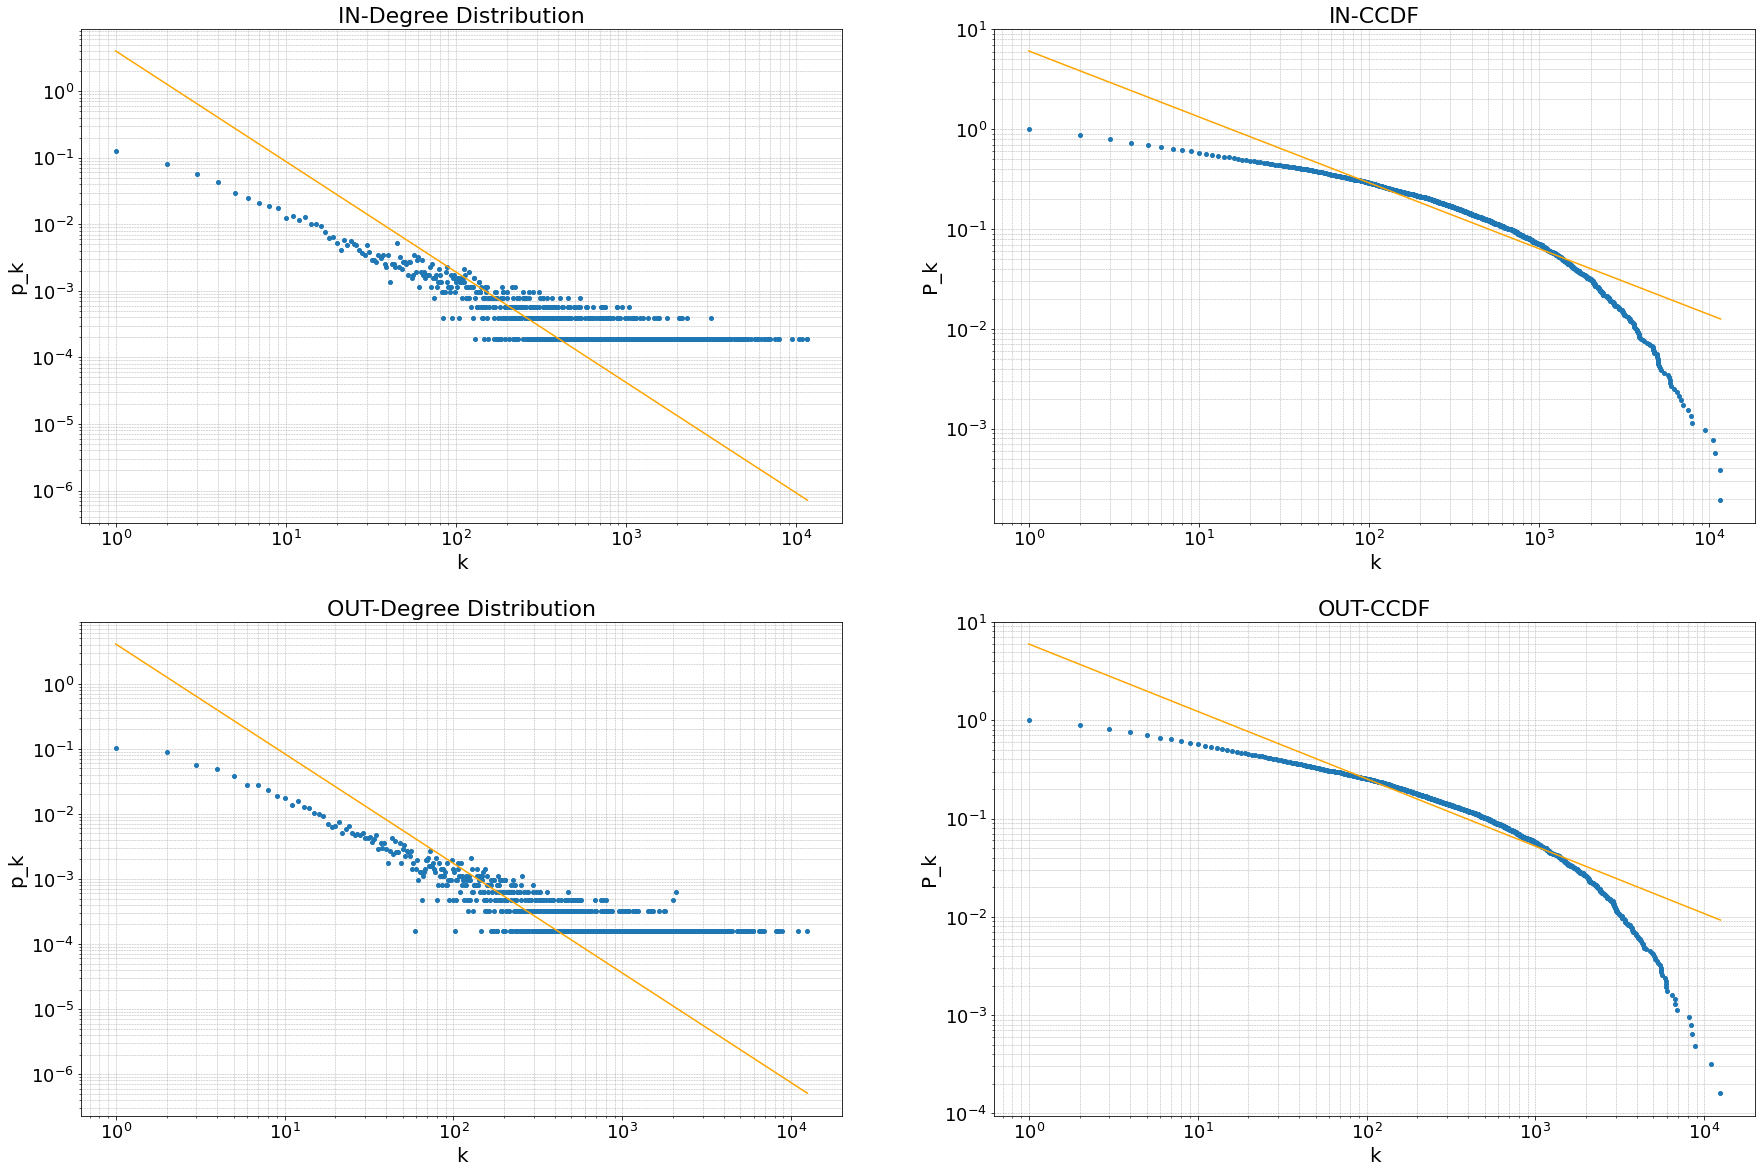

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (30, 20))

def plot_gamma(ax, x, y, title, p, cumulative=False):
    ax.loglog(x, y, 'o', markersize = 4)
    ax.loglog(x, p, color='orange')
    ax.grid(which='both', linestyle='--', linewidth=0.5)
    ax.set_title(title, size = 22)
    ax.set_xlabel("k", size = 20)
    if cumulative:
        ax.set_ylabel("P_k", size = 20)
    else:
        ax.set_ylabel("p_k", size = 20)
    ax.tick_params(labelsize=18)
    ax.tick_params(labelsize=18)

plot_gamma(ax[0,0], x_in, y_in, "IN-Degree Distribution", pk_in)
plot_gamma(ax[0,1], x_in, Pk_in, "IN-CCDF", Pk_est_in, True)
plot_gamma(ax[1,0], x_out, y_out, "OUT-Degree Distribution", pk_out)
plot_gamma(ax[1,1], x_out, Pk_out, "OUT-CCDF", Pk_est_out, True)
plt.show()

### Estimating $\gamma$ through a linear fit with log binning

In [15]:
# Log binning 
nbins = 20
bins = np.logspace(0, 3.3, nbins)

hist_in = np.histogram(d_in, bins=bins, density=True)
hist_out = np.histogram(d_out, bins=bins, density=True)
logbin_p_k_in = hist_in[0]
logbin_p_k_out = hist_out[0]
middle_bins = np.sqrt( np.delete(bins, 0) * np.delete(bins, nbins-1) )

mask = np.log10(middle_bins) > np.log10(kmin)
x = np.log10( middle_bins[mask] )
y_in = np.log10( logbin_p_k_in[mask] )
y_out = np.log10( logbin_p_k_out[mask] )

# Linear fit
params_in = np.polyfit(x, y_in, deg =1)
params_out = np.polyfit(x, y_out, deg =1)
lin_gamma_in = -params_in[0]
lin_gamma_out = -params_out[0]

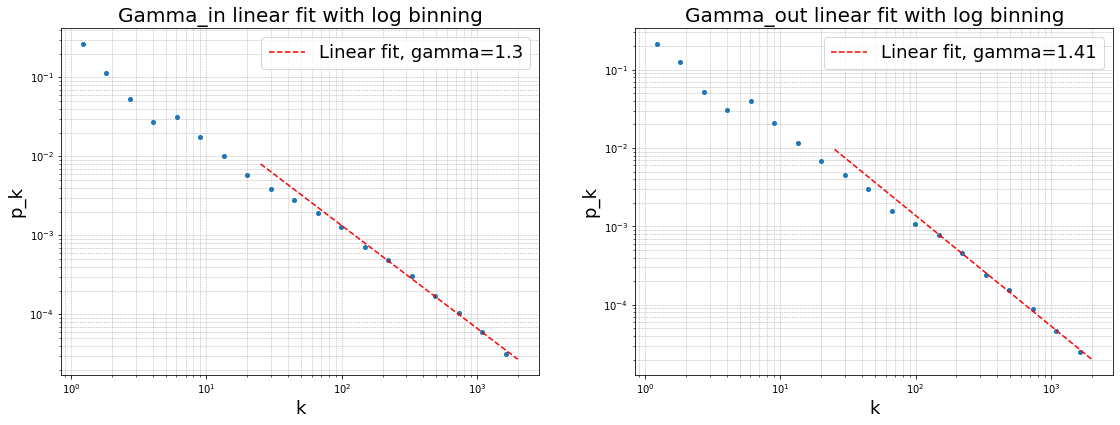

In [16]:
plt.figure(figsize=(60, 60))
plt.subplot(8, 6, 1)
plt.loglog(middle_bins, logbin_p_k_in , 'o', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Gamma_in linear fit with log binning", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("p_k", size = 18)
x2 = np.logspace(1.4,3.3,100)
y2 = np.full( 100, 10**(params_in[1])*x2**(-lin_gamma_in) ) 
plt.plot(x2,y2, label ="Linear fit, gamma="+str( np.round(lin_gamma_in,2) ), color="red", linestyle="--")
plt.legend(fontsize=18)

plt.subplot(8, 6, 2)
plt.loglog(middle_bins, logbin_p_k_out , 'o', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Gamma_out linear fit with log binning", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("p_k", size = 18)
x2 = np.logspace(1.4,3.3,100)
y2 = np.full( 100, 10**(params_out[1])*x2**(-lin_gamma_out) ) 
plt.plot(x2,y2, label ="Linear fit, gamma="+str( np.round(lin_gamma_out,2) ), color="red", linestyle="--")
plt.legend(fontsize=18)

plt.show()

### HITS (NetworkX)

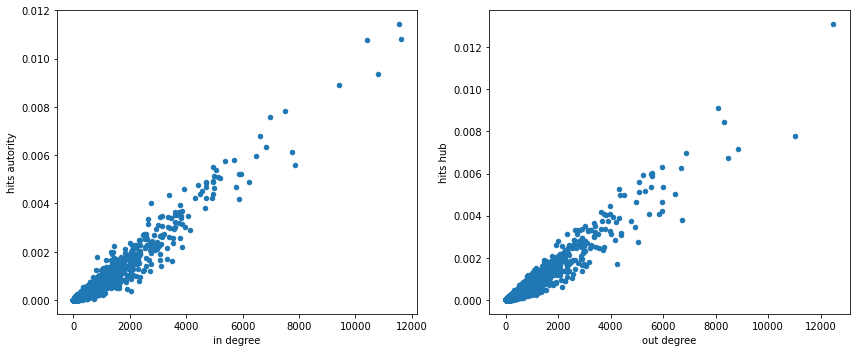

Top 10 for hits hub


,Nodes,hits hub
3861,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.013100
5478,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.009089
2554,UNIVERSITA DEGLI STUDI DI PADOVA,0.008444
3106,UNIVERSIDAD DE GRANADA,0.007785
6387,UNIVERSITAT DE VALENCIA,0.007185
5322,KATHOLIEKE UNIVERSITEIT LEUVEN,0.006954
4419,UNIVERSIDAD COMPLUTENSE DE MADRID,0.006739
867,UNIVERSIDADE DE LISBOA,0.006314
6716,UNIVERSITA DEGLI STUDI DI TORINO,0.006247
6181,UNIWERSYTET WARSZAWSKI,0.006037


Top 10 for hits autority


,Nodes,hits autority
3861,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.011440
6387,UNIVERSITAT DE VALENCIA,0.010822
867,UNIVERSIDADE DE LISBOA,0.010794
3106,UNIVERSIDAD DE GRANADA,0.009381
4419,UNIVERSIDAD COMPLUTENSE DE MADRID,0.008920
5322,KATHOLIEKE UNIVERSITEIT LEUVEN,0.007841
3378,UNIVERSIDAD DE SEVILLA,0.007591
3086,UNIVERSITAT DE BARCELONA,0.006804
4048,NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET...,0.006340
6023,UNIVERZA V LJUBLJANI,0.006119


In [17]:
df = ns.hits_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'hits hub')
ns.display_top_n(scores, 10, 'hits autority')

### PageRank (NetworkX)

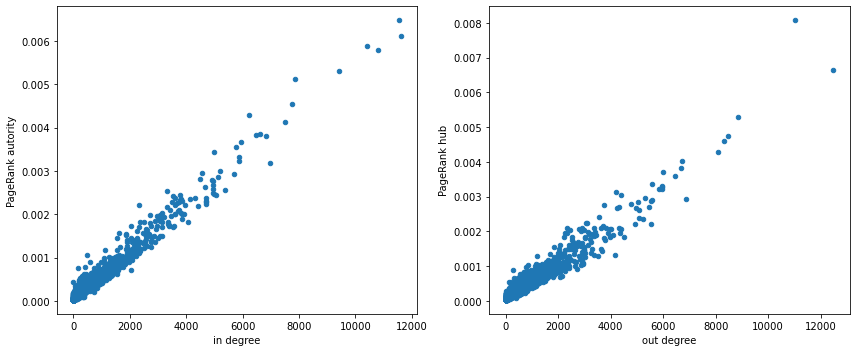

Top 10 for PageRank hub


,Nodes,PageRank hub
3106,UNIVERSIDAD DE GRANADA,0.008073
3861,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006650
6387,UNIVERSITAT DE VALENCIA,0.005288
4419,UNIVERSIDAD COMPLUTENSE DE MADRID,0.004742
2554,UNIVERSITA DEGLI STUDI DI PADOVA,0.004605
5478,UNIVERSITA DEGLI STUDI DI ROMA LA SAPIENZA,0.004285
1505,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,0.004039
6716,UNIVERSITA DEGLI STUDI DI TORINO,0.003837
6023,UNIVERZA V LJUBLJANI,0.003712
1241,UNIVERSIDAD POLITECNICA DE MADRID,0.003598


Top 10 for PageRank autority


,Nodes,PageRank autority
3861,ALMA MATER STUDIORUM - UNIVERSITA DI BOLOGNA,0.006472
6387,UNIVERSITAT DE VALENCIA,0.006109
867,UNIVERSIDADE DE LISBOA,0.005881
3106,UNIVERSIDAD DE GRANADA,0.005778
4419,UNIVERSIDAD COMPLUTENSE DE MADRID,0.005299
5990,UNIVERSITAT POLITECNICA DE VALENCIA,0.005129
6023,UNIVERZA V LJUBLJANI,0.004541
5695,POLITECNICO DI MILANO,0.004299
5322,KATHOLIEKE UNIVERSITEIT LEUVEN,0.004136
3086,UNIVERSITAT DE BARCELONA,0.003863


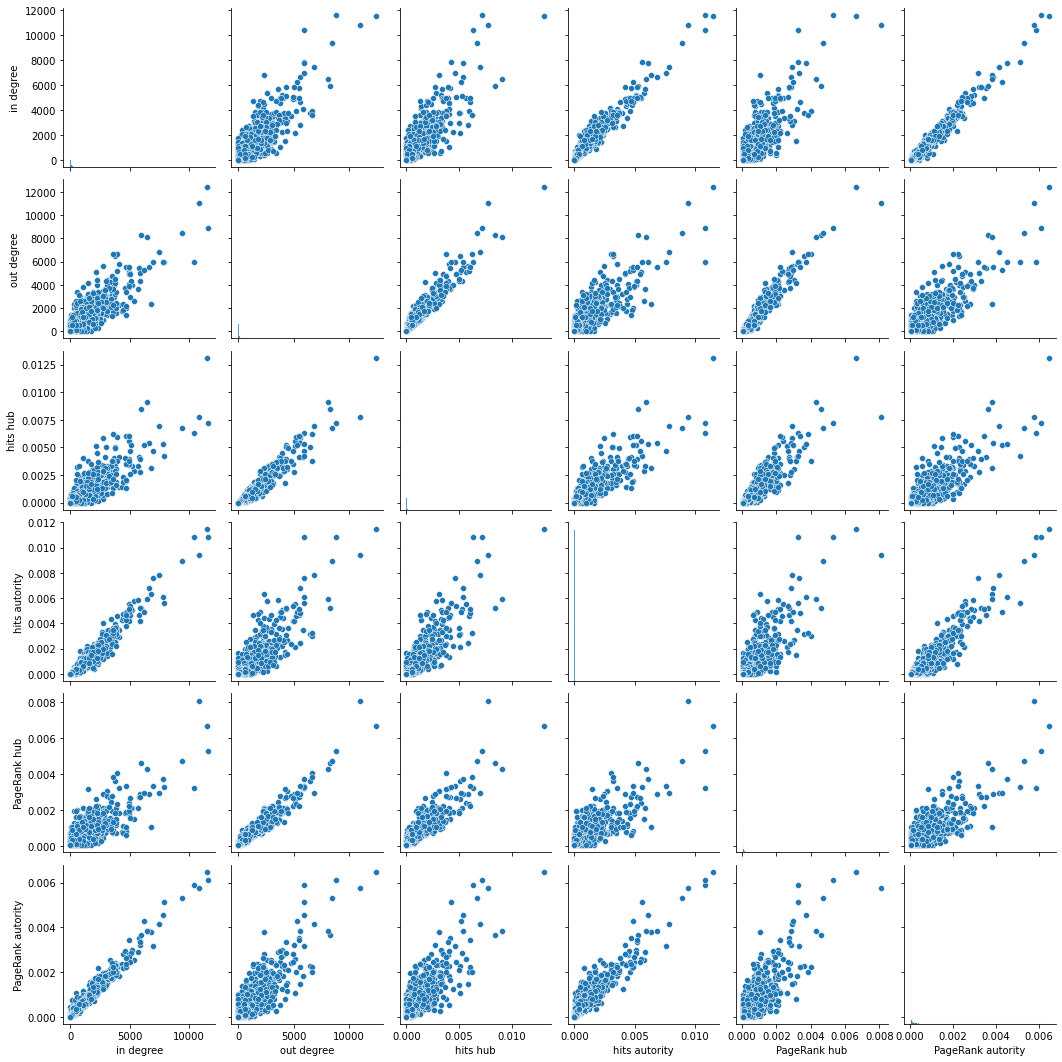

In [18]:
df = ns.pagerank_alg(adj_matrix_crs, nodes_df, score_df=scores, print_graph=True)
scores = pd.merge(scores, df, on='Nodes')

ns.display_top_n(scores, 10, 'PageRank hub')
ns.display_top_n(scores, 10, 'PageRank autority')
# ci vuole troppo a farlo
sns.pairplot(scores[['in degree', 'out degree',  'hits hub',
       'hits autority', 'PageRank hub', 'PageRank autority']])
plt.show()
# from IPython.display import Image
# Image('pairplot_score.png',)

### Assortativity

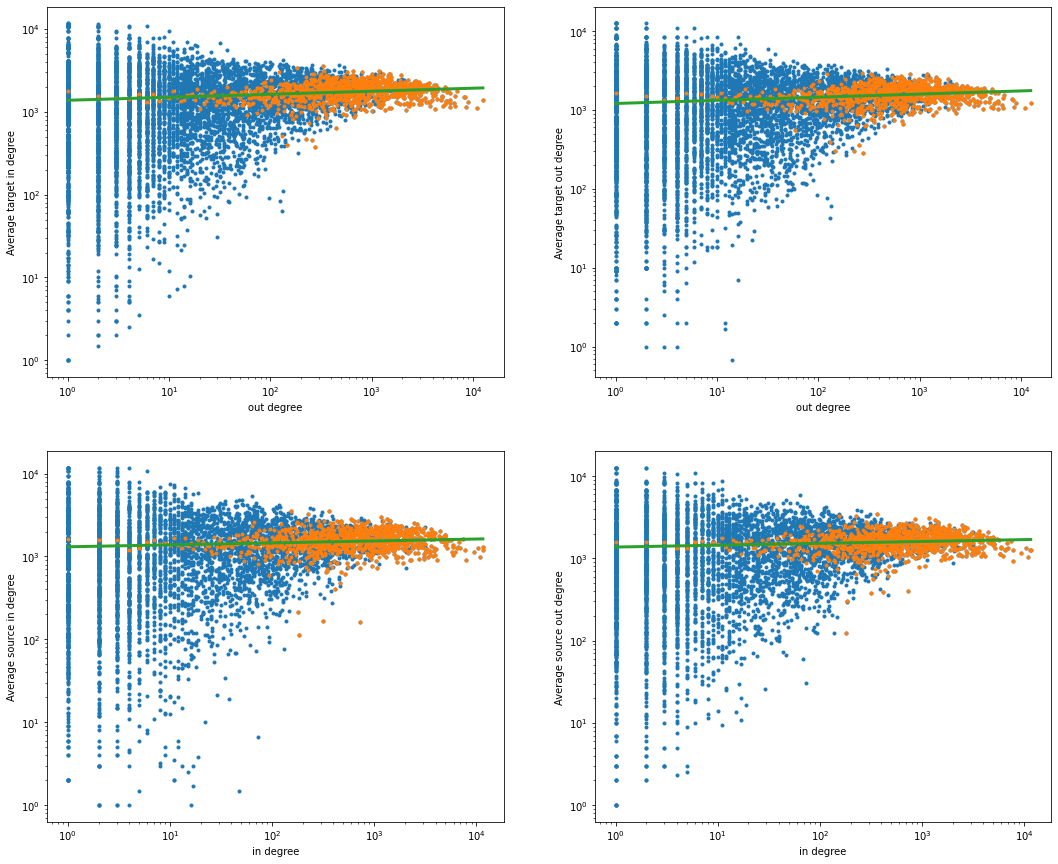

(0.03640513833878802,
 0.03978985392617848,
 0.02346311267528153,
 0.0225624509545072)

In [19]:
edges = mobility_df.copy()
ns.assortativity_calc(edges, adj_matrix_crs, nodes_df, True)

## Communities

In [21]:
import networkx as nx

# G = nx.convert_matrix.from_scipy_sparse_matrix(adj_matrix_crs)
G = nx.convert_matrix.from_scipy_sparse_matrix(adj_matrix_crs, create_using= nx.DiGraph)
p = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
node_comm = nodes_df.copy()
node_comm.drop(columns=['NodeID'], inplace=True)

node_comm['Community']=np.zeros(len(node_comm.index),dtype='int8')
for i, set in enumerate(p):
    for element in set:
        node_comm.iat[element, 1]=i
for i, set in enumerate(p):
    display(node_comm[node_comm['Community']==i])
    
scores['uni_Community'] = node_comm['Community']
# 52 communities. Choose if it makes sense to reduce the number of them 

,Nodes,Community
0,MAHARASHTRA INSTITUTE OF TECHNOLOGY PUNE,0
2,UNIVERSITE DE MOSTAGANEM,0
3,BALTIJAS PSIHOLOGIJAS UN MENEDZMENTA AUGSTSKOLA,0
8,TECHNISCHE UNIVERSITAT HAMBURG-HARBURG,0
10,VIESOJI ISTAIGA VILNIAUS VERSLO KOLEGIJA,0
...,...,...
7104,HOGSKOLEN I INNLANDET,0
7106,ACCADEMIA TIEPOLO SRL,0
7108,FUTURE UNIVERSITY IN EGYPT,0
7111,PANSTWOWA WYZSZA SZKOLA ZAWODOWA W WALCZU,0


,Nodes,Community
1,UNIVERSITE DES ANTILLES ET DE LA GUYANE,1
4,EZZITOUNA UNIVERSITY,1
5,UNIVERSITAS NEGERI YOGYAKARTA,1
6,KYRGYZ-RUSSIAN SLAVIC UNIVERSITY,1
7,CAIRO UNIVERSITY,1
...,...,...
7096,SVEUCILISTE U ZADRU,1
7099,THE UNIVERSITY OF HONG KONG,1
7103,UNIVERSITE FELIX HOUPHOUET BOIGNY,1
7105,UNIVERZITA PAVLA JOZEFA SAFARIKA V KOSICIACH,1


,Nodes,Community
12,UNIVERSITETIT TE VLORES,2
41,EAST CHINA UNIVERSITY OF POLITICAL SCIENCE AND...,2
54,POLITIEACADEMIE,2
71,EURASIAN TECHNOLOGICAL UNIVERSITY,2
82,"CONSERVATORIO DI MUSICA ""ARRIGO PEDROLLO"" DI V...",2
...,...,...
7059,KAZAN INNOVATIVE UNIVERSITY NAMED AFTER V.G.T...,2
7068,"CONSERVATORIO STATALE DI MUSICA ""GIUSEPPE VERD...",2
7075,BARRATT DUE MUSIKKINSTITUTT,2
7085,MUSIKENE CENTRO SUPERIOR DE MÚSICA DEL PAÍS VA...,2


,Nodes,Community
80,UNIVERSITATEA PETROL SI GAZE PLOIESTI,3
165,PAEDAGOGISCHE HOCHSCHULE NIEDERÖSTERREICH,3
188,IPU BERLIN,3
241,REGENT'S UNIVERSITY LONDON LIMITED,3
303,P.STRADINS MEDICAL COLLEGE OF THE UNIVERSITY O...,3
...,...,...
6900,DEBRECENI REFORMÁTUS HITTUDOMÁNYI EGYETEM,3
6901,ASSOCIATION POUR LE DÉVELOPPEMENT ÉCONOMIQUE E...,3
6969,NEAPOLIS UNIVERSITY,3
6990,AKADEMIA IM. JANA DLUGOSZA W CZESTOCHOWIE,3


,Nodes,Community
9,SCOALA NATIONALA DE STUDII POLITICE SI ADMINIS...,4
37,LEBANESE INTERNATIONAL UNIVERSITY,4
97,INTERNATIONAL MANAGEMENT INSTITUTE KOLKATA (AL...,4
195,IRKUTSK STATE UNIVERSITY OF RAILWAY ENGINEERING,4
199,"LYCÉE CHRISTIAN BOURQUIN, LYCÉE POLYVALENT DES...",4
...,...,...
7030,ROSTOVSKIJ GOSUDARSTVENNYJ EKONOMICHESKIJ UNIV...,4
7063,CITI INSTITUTE,4
7101,CORPORACIÓN UNIVERSIDAD CENTRAL DE CHILE,4
7107,GORI STATE TEACHING UNIVERSITY,4


,Nodes,Community
89,ESCOLA SUPERIOR DE ENFERMAGEM DE LISBOA (ESEL),5
93,ST. AUGUSTINE UNIVERSITY OF TANZANIA,5
104,UNIVERSIDAD DE PINAR DEL RIO HERMANOS SAIZ MON...,5
310,PLUMPTON COLLEGE,5
318,EUROPEAN UNIVERSITY OF MOLDOVA,5
...,...,...
6692,KASETSART UNIVERSITY,5
6806,UNIVERSIDAD RAFAEL LANDÍVAR,5
6882,UNIVERSIDAD MAYOR DE SAN SIMON,5
6963,INTERNATIONAL UNIVERSITY OF KYRGYZ REPUBLIC,5


,Nodes,Community
437,EIA - ENSINO E INVESTIGACAO E ADMINISTRACAO SA,6
1358,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER LE N...,6
1418,LYCÉE JULES GUESDE,6
2002,IES ESCUELA SUPERIOR DE HOSTELERÍA Y TURISMO,6
2115,I.E.S. FERMIN BOUZA BREY,6
3390,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER LE N...,6
4040,INSTITUT ESCOLA DEL TREBALL,6
4623,INSTITUT DE VIC,6
5853,LYCEE GENERAL TECHNIQUE GASTON BERGER,6
6540,MOHAWK COLLEGE OF APPLIED ARTS AND TECHNOLOGY,6


,Nodes,Community
315,ISLAMIC UNIVERSITY OF APPLIED SCIENCES ROTTERDAM,7
497,UNIVERSITE EZ-ZITOUNA,7
708,INTERNATIONAL CENTRE FOR EDUCATION IN ISLAMIC ...,7
1034,UNIVERSITE ALQUARAOUIYINE,7
2698,UNIVERSITE IBNOU ZOHR A AGADIR,7
5307,ISTANBUL SABAHATTIN ZAIM UNIVERSITY,7
5938,MIDDLE EAST UNIVERSITY,7


,Nodes,Community
101,CENTRO INTEGRAL DE FP ILERNA S.L.,8
379,IES MARIA DE ZAYAS Y SOTOMAYOR,8
1516,CENTRE INTEGRAL DE FP ILERNA S.L.,8
1644,FONDAZIONE ISTITUTO TECNICO SUPERIORE PER TECN...,8
1656,SOUTH WEST COLLEGE,8
2353,IES HOTEL ESCUELA,8
7074,LYCÉE DES MÉTIERS DE L'HÔTELLERIE ET DU TOURIS...,8


,Nodes,Community
1836,ÖREBRO SCHOOL OF THEOLOGY,9
3445,ANSGAR TEOLOGISKE HØGSKOLE,9
3449,EESTI EVANGEELIUMI KRISTLASTE JA BAPTISTIDE KO...,9
4052,KAREN BAPTIST THEOLOGICAL SEMINARY,9
6823,LONDON SCHOOL OF THEOLOGY,9
6949,AKADEMI FÖR LEDARSKAP OCH TEOLOGI,9


,Nodes,Community
270,COLLEGE OF PROFESSIONAL STUDIES IN MANAGEMENT ...,10
1057,"FAKULTETA ZA UPRAVLJANJE, POSLOVANJE IN INFORM...",10
2106,VISOKA POSLOVNA STRUKOVNIH SKOLA STDIJA U NOVO...,10
4800,VISOKA SKOLA ZA MENADZMENT U TURIZMU I INFORMA...,10
5520,VISOKA SOLA ZA UPRAVLJANJE IN POSLOVANJE NOVO ...,10


,Nodes,Community
1076,ASSOCIATION RÉGIONALE POUR LA FORMATION PLURIP...,11
1797,HAUTE ECOLE EN HAINAUT,11
4023,CROIX ROUGE FRANCAISE CRF IRFSS PACAC,11
4071,ARFIS OI,11
5810,IRTS REUNION,11


,Nodes,Community
823,BAIKAL STATE UNIVERSITY,12
1055,IRKUTSK STATE UNIVERSITY,12
1097,SAINT PETERSBURG NATIONAL RESEARCHUNIVERSITY O...,12
3442,SAINT PETERSBURG NATIONAL RESEARCH UNIVERSITY ...,12
6325,HOCHSCHULE ZITTAU/GOERLITZ,12


,Nodes,Community
3303,IAKOB GOGEBASHVILI TELAVI SATE UNIVERSITY,13
3890,"EDUCATIONAL INSTITUTION ""BELARUSSIAN STATE PED...",13
4942,LTD EAST EUROPEAN UNIVERSITY,13
5303,PADAGOGISCHE HOCHSCHULE OBEROSTERREICH,13


,Nodes,Community
2758,HAUTE ECOLE PAUL-HENRI SPAAK,14
3721,INSTITUT RÉGIONAL DU TRAVAIL SOCIAL NORMANDIE ...,14
3879,INSTITUT RÉGIONAL DU TRAVAIL SOCIAL DE CHAMPAG...,14
5619,HAUTE ECOLE BRUXELLES-BRABANT (HE2B),14


,Nodes,Community
154,RUSSIAN CHRISTIAN ACADEMY FOR THE HUMANITIES,15
405,SCUOLA SUPERIORE PER MEDIATORI LINGUISTICI,15
5737,FEDERAL STATE BUDGETARY EDUCATIONAL INSTITUTIO...,15
6710,KEMEROVO STATE UNIVERSITY,15


,Nodes,Community
34,"INSTITUT SUPÉRIEUR DE L'EDUCATION SPÉCIALISÉE,...",16
1004,INSTITUT NATIONAL SUPERIEUR DE FORMATION ET DE...,16
3464,ASTRAKHAN STATE UNIVERSITY,16


,Nodes,Community
1812,LEBANESE UNIVERSITY,17
3630,INSTITUT NATIONAL AGRONOMIQUE DE TUNISIE,17
3860,CENTRE INTERNATIONAL DES HAUTES ETUDES AGRONOM...,17


,Nodes,Community
2375,ACADEMIA DRUZBA ZA STORITVE DOO,18
3343,EUROPEAN UNIVERSITY - REPUBLIC OF MACEDONIA,18
5071,UNIVERSIDAD TECNOLOGICA DE EL SALVADOR,18


,Nodes,Community
1654,ESCOLA NAVAL,19
3186,ECOLE NAVALE GROUPEMENT INTERET PUBLIC,19
5124,UNITED STATES NAVAL ACADEMY,19


,Nodes,Community
2379,INS JOAQUIM MIR,20
4553,LYCEE LOUISE MICHEL,20
5535,LYCÉE GÉNÉRAL ET TECHNOLOGIQUE JEAN MACE,20


,Nodes,Community
5404,UNIVERSIDAD NACIONAL ARTURO JAURETCHE,21
5677,WSZECHNICA POLSKA SZKOLA WYZSZA W WARSZAWIE,21
5700,PUSHKIN STATE RUSSIAN LANGUAGE INSTITUTE,21


,Nodes,Community
1583,STATE EDUCATIONAL INSTITUTION OF HIGHER PROFES...,22
2281,NOVOSIBIRSK STATE UNIVERSITY,22
5890,ECOLE INTERNATIONALE DES SCIENCES DU TRAITEMEN...,22


,Nodes,Community
5070,ANOTATI ECCLESIASTIKI AKADEMIA THESSALONIKIS,23
5310,RELIGIOUS ORGANIZATION OF HIGHER THEOLOGICAL E...,23
6420,KYIV THEOLOGICAL ACADEMY AND SEMINARY OF UKRAI...,23


,Nodes,Community
2632,LYCEE OZENNE,24
5717,INSTITUT JOAN BROSSA,24
6658,LYCÉE GEORGES DUBY,24


,Nodes,Community
368,EVANGELISCHE HOCHSCHULE FÜR KIRCHENMUSIK TÜBINGEN,25
1827,ERSTA SKÖNDAL BRÄCKE HÖGSKOLA,25


,Nodes,Community
1206,INSTITUTO DE EDUCACIÓN SECUNDARIA JUAN CARLOS I,26
2275,EPLEFPA LOT ET GARONNE,26


,Nodes,Community
1847,STREDOEUROPSKA VYSOKA SKOLA V SKALICI,27
2760,"VYSOKA SKOLA EVROPSKYCH A REGIONALNICH STUDII,...",27


,Nodes,Community
19,ISTITUTO DI CULTURA PANTHEON S.R.L.,28
3528,ESCOLA MUNICIPAL D'ART I DISSENY DE TERRASSA,28


,Nodes,Community
809,MF VITENSKAPELIG HØYSKOLE,29
3774,PACIFIC LUTHERAN UNIVERSITY,29


,Nodes,Community
3423,YNCRÉA HAUTS DE FRANCE ISEN-LILLE,30
3790,AMERICAN UNIVERSITY OF SCIENCE AND TECHNOLOGY,30


,Nodes,Community
1407,DAUGAVPILS MEDICAL COLLEGE,31
3901,MEHRABYAN MEDICAL INSTITUTE IN YEREVAN,31


,Nodes,Community
947,PANSTWOWA WYZSZA SZKOLA ZAWODOWA IM. HIPOLITA ...,32
4962,PAVLO TYCHYNA UMAN STATE PEDAGOGICAL UNIVERSITY,32


,Nodes,Community
4131,"ISTITUTO SUPERIORE DI STUDI MUSICALI ""TOSCANINI""",33
5162,PETROZAVODSK STATE GLAZUNOV CONSERVATOIRE,33


,Nodes,Community
3589,COLLEGE OF APPLIED SCIENCES LAVOSLAV RUZICKA I...,34
5211,"SVEUČILIŠTE/UNIVERZITET ""VITEZ"" VITEZ",34


,Nodes,Community
3290,ACCADEMIA DI BELLE ARTI ALDO GALLI - I.L.E.M. SRL,35
5323,ESCUELA DE ARTE Y SUPERIOR DE CONSERVACIÓN Y R...,35


,Nodes,Community
1933,INSTITUT POBLENOU,36
5476,LYCEE AMPERE,36


,Nodes,Community
320,VYSOKA SKOLA DANUBIUS S.R.O.,37
5528,VOLGA STATE UNIVERSITY OF TECHNOLOGY,37


,Nodes,Community
963,"VYSOKA SKOLA EVROPSKYCH A REGIONALNICH STUDII,...",38
5586,DUBNICKY TECHNOLOGICKY INSTITUT V DUBNICKI NAD...,38


,Nodes,Community
1073,INSTITUTO DE EDUCACIÓN SECUNDARIA HOZGARGANTA,39
6407,VANCOUVER ISLAND UNIVERSITY,39


,Nodes,Community
2494,HOCHSCHULE FÜR ANGEWANDTES MANAGEMENT GMBH,40
6493,PRIVATUNIVERSITÄT SCHLOSS SEEBURG,40


,Nodes,Community
6196,THE MAXIM GORKY LITERARY INSTITUTE,41
6839,FONDAZIONE UNICAMPUS SAN PELLEGRINO,41


,Nodes,Community
5457,UNIVERSITY OF GUELPH NON-PROFIT CORPORATION,42
6874,HOLAR UNIVERSITY COLLEGE,42


,Nodes,Community
355,ACCOUNTANCY & BUSINESS COLLEGE (IRELAND) LIMIT...,43
7080,SUD MANAGEMENT,43


,Nodes,Community
3588,UNIVERSITY OF THE PUNJAB,44


## Geographical heatmap

In [ ]:
city

NameError: name 'city' is not defined

In [23]:
temp_df = uni_cities[['target', 'Receiving City']].copy()
temp_df.rename({'target':'source', 'Receiving City':'Sending City'},axis=1, inplace=True)
cities_uni = pd.concat([uni_cities[['source', 'Sending City']], temp_df]).drop_duplicates().reset_index(drop=True)
cities_uni.dropna(subset=['Sending City'], inplace=True)

for index in range(cities_uni.shape[0]):
    city = cities_uni.iat[index,1]
    if city != city.upper():
        cities_uni.iat[index,1] = city.upper()
cities_uni = cities_uni.drop_duplicates().reset_index(drop=True)
cities_uni = cities_uni.drop_duplicates(subset='source').reset_index(drop=True)

# assigning cities to each university in scores
cities_list = []
for u in scores['Nodes']:
    cities_list.append(list(cities_uni.loc[cities_uni['source'] == u, 'Sending City'])[0])

scores_cities = scores.copy()
scores_cities['City'] = cities_list

scores_cities

,Nodes,NodeID_x,in degree,out degree,NodeID_y,hits hub,hits autority,NodeID,PageRank hub,PageRank autority,uni_Community,City
0,MAHARASHTRA INSTITUTE OF TECHNOLOGY PUNE,0,0,4,0,6.977408e-06,-0.000000e+00,0,0.000031,0.000027,0,PUNE
1,UNIVERSITE DES ANTILLES ET DE LA GUYANE,1,90,13,1,9.061183e-06,6.788240e-05,1,0.000033,0.000083,1,POINTE A PITRE CEDEX
2,UNIVERSITE DE MOSTAGANEM,2,0,13,2,9.980353e-06,-0.000000e+00,2,0.000035,0.000027,0,MOSTAGANEM
3,BALTIJAS PSIHOLOGIJAS UN MENEDZMENTA AUGSTSKOLA,3,7,5,3,3.116617e-08,7.041541e-06,3,0.000039,0.000031,0,RIGA
4,EZZITOUNA UNIVERSITY,4,3,3,4,4.592208e-07,2.637700e-06,4,0.000032,0.000028,1,TUNIS
...,...,...,...,...,...,...,...,...,...,...,...,...
7108,FUTURE UNIVERSITY IN EGYPT,7108,0,11,7108,5.995977e-07,-0.000000e+00,7108,0.000033,0.000027,0,NEW CAIRO
7109,ARISTOTELIO PANEPISTIMIO THESSALONIKIS - EIDIK...,7109,131,560,7109,5.570516e-04,1.498430e-04,7109,0.000336,0.000095,1,THESSALONIKI
7110,OCEAN UNIVERSITY OF CHINA,7110,4,28,7110,3.388585e-06,2.055888e-06,7110,0.000089,0.000029,4,QINGDAO
7111,PANSTWOWA WYZSZA SZKOLA ZAWODOWA W WALCZU,7111,35,2,7111,3.433459e-07,4.531120e-07,7111,0.000030,0.000031,0,WA�CZ


In [24]:
city_coord = pd.read_csv('worldcities.csv', encoding='utf8')
city_coord.drop(columns=['capital', 'population', 'id', 'iso3', 'country'], inplace=True)
for index in range(city_coord.shape[0]):
    city = city_coord.iat[index,0]
    if city != city.upper():
        city_coord.iat[index,0] = city.upper()
city_coord = city_coord.drop_duplicates().reset_index(drop=True)
scores_cities = pd.merge(left=scores_cities, right=city_coord, how='left', left_on='City', right_on='city')
scores_cities.dropna(subset=['city'], inplace=True)
scores_cities = scores_cities.drop_duplicates(subset='Nodes').reset_index(drop=True)
scores_cities

# some cities are missing like Milano, Torino, Madrid (these are also pretty much important)

,Nodes,NodeID_x,in degree,out degree,NodeID_y,hits hub,hits autority,NodeID,PageRank hub,PageRank autority,uni_Community,City,city,city_ascii,lat,lng,iso2,admin_name
0,MAHARASHTRA INSTITUTE OF TECHNOLOGY PUNE,0,0,4,0,6.977408e-06,-0.000000e+00,0,0.000031,0.000027,0,PUNE,PUNE,Pune,18.5196,73.8553,IN,Mahārāshtra
1,UNIVERSITE DE MOSTAGANEM,2,0,13,2,9.980353e-06,-0.000000e+00,2,0.000035,0.000027,0,MOSTAGANEM,MOSTAGANEM,Mostaganem,35.9333,0.0903,DZ,Mostaganem
2,BALTIJAS PSIHOLOGIJAS UN MENEDZMENTA AUGSTSKOLA,3,7,5,3,3.116617e-08,7.041541e-06,3,0.000039,0.000031,0,RIGA,RIGA,Riga,56.9475,24.1069,LV,Rīga
3,EZZITOUNA UNIVERSITY,4,3,3,4,4.592208e-07,2.637700e-06,4,0.000032,0.000028,1,TUNIS,TUNIS,Tunis,36.8008,10.1800,TN,Tunis
4,UNIVERSITAS NEGERI YOGYAKARTA,5,0,6,5,7.733976e-06,-0.000000e+00,5,0.000033,0.000027,1,YOGYAKARTA,YOGYAKARTA,Yogyakarta,-7.8014,110.3644,ID,Yogyakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,UNIVERSITE FELIX HOUPHOUET BOIGNY,7103,0,23,7103,2.517658e-05,-0.000000e+00,7103,0.000040,0.000027,1,ABIDJAN,ABIDJAN,Abidjan,5.3364,-4.0267,CI,Abidjan
4936,HOGSKOLEN I INNLANDET,7104,455,143,7104,9.828796e-05,1.781230e-04,7104,0.000108,0.000267,0,LILLEHAMMER,LILLEHAMMER,Lillehammer,61.1146,10.4674,NO,Oppland
4937,ACCADEMIA TIEPOLO SRL,7106,2,0,7106,-0.000000e+00,5.992653e-11,7106,0.000029,0.000033,0,UDINE,UDINE,Udine,46.0667,13.2333,IT,Friuli-Venezia Giulia
4938,GORI STATE TEACHING UNIVERSITY,7107,0,2,7107,6.654739e-08,-0.000000e+00,7107,0.000030,0.000027,4,GORI,GORI,Gori,41.9817,44.1124,GE,Shida Kartli


Importing geographic data also for countries

In [25]:
import geopandas as gpd
import pycountry as pc #library used for translating country codes from iso3 to iso2 standard

geo_df = gpd.read_file('countries.geojson')

def replace_iso2(alpha):
    try:
        return pc.countries.get(alpha_3=alpha).alpha_2
    except:
        return alpha
    
geo_df['iso2_code']= (np.array(list(map(lambda x: replace_iso2(x), geo_df['ISO_A3']))))

geo_df.columns = ['country', 'country_code', 'geometry', 'iso2_code']

# in geo_df United Kingdom has code GB, so we have to change it manually
# geo_df.loc[geo_df['country'] == 'United Kingdom', 'iso2_code'] = 'UK'
# geo_df.loc[geo_df['country'] == 'Greece', 'iso2_code'] = 'EL'
geo_df.loc[geo_df['country'] == 'Kosovo', 'iso2_code'] = 'XK'
geo_df.loc[geo_df['country'] == 'Czech Republic', 'country'] = 'Czechia'
geo_df.loc[geo_df['country'] == 'Republic of Serbia', 'country'] = 'Serbia'

# merge geometries with our dataframe
geo_scores = pd.merge(left=scores_cities, right=geo_df[['iso2_code', 'geometry']], how='left', 
                      left_on='iso2', right_on='iso2_code')
geo_scores = geo_scores[['Nodes', 'PageRank hub', 'PageRank autority', 'City', 'lat', 'lng',
                         'iso2', 'geometry', 'uni_Community']]

Dividing universities by their country community

In [104]:
import networkx as nx

### 1 create the network of countries only
country_df = c_df[c_df[c_df.columns[10]]=='Learner']
country_df = country_df.loc[:, c_df.columns[np.array((14, 17, 20))]]
country_df.dropna(how='any', inplace=True)

# c_nodes = np.array(list(set.union(set(country_df.loc[:, country_df.columns[0]]), set(country_df.loc[:, country_df.columns[1]]))))
c_nodes = np.array(list(pd.concat([country_df.loc[:, country_df.columns[0]], country_df.loc[:, country_df.columns[1]]]).drop_duplicates()))
country_df.dropna(how='any', inplace=True)

c_node_position = {}
for i, name in enumerate(c_nodes):
    c_node_position[name] = i
country_nodes= pd.DataFrame({'Nodes': c_nodes})
country_df['SendId'] = (np.array(list(map(lambda x: c_node_position[x], country_df['Sending Country Code']))))
country_df['RecId'] = (np.array(list(map(lambda x: c_node_position[x], country_df['Receiving Country Code']))))

# Adjacency matrix
country_serie = country_df.groupby(['SendId', 'RecId']).sum()
row = np.array(country_serie.index.get_level_values(1).tolist())
col = np.array(country_serie.index.get_level_values(0).tolist())
val = country_serie.values
c_adj_matrix = sparse.csr_matrix((val.flatten(), (row, col)), shape=(c_nodes.size, c_nodes.size))

### 2 countries community
# G_country = nx.convert_matrix.from_scipy_sparse_matrix(c_adj_matrix)
G_country = nx.convert_matrix.from_scipy_sparse_matrix(c_adj_matrix, create_using= nx.DiGraph)
p_c = nx.algorithms.community.modularity_max.greedy_modularity_communities(G_country)
country_comm = country_nodes.copy()
# some countries have a different code
country_comm.loc[country_comm['Nodes'] == 'UK', 'Nodes'] = 'GB'
country_comm.loc[country_comm['Nodes'] == 'EL', 'Nodes'] = 'GR'

country_comm['Community']=np.zeros(len(country_comm.index),dtype='int8')



for i, set in enumerate(p_c):
    for element in set:
        country_comm.iat[element, 1]=i
for i, set in enumerate(p_c):
    display(country_comm[country_comm['Community']==i])

geo_scores = pd.merge(left=geo_scores, right=country_comm, how='left', left_on='iso2', right_on='Nodes')

,Nodes,Community
1,IT,0
2,AT,0
6,ET,0
10,TH,0
11,KG,0
...,...,...
145,BI,0
149,MR,0
150,PA,0
151,BB,0


,Nodes,Community
0,EE,1
3,CN,1
4,RU,1
5,CU,1
7,RS,1
...,...,...
134,SK,1
146,BN,1
147,TL,1
148,BW,1


,Nodes,Community
22,UZ,2
38,BF,2
51,FR,2
74,NE,2
79,SG,2
...,...,...
130,SE,2
131,ZW,2
133,VE,2
138,CI,2


,Nodes,Community
29,BE,3
41,CD,3
45,SR,3
47,AL,3
62,DO,3
63,XK,3
68,BJ,3
82,KH,3
118,LT,3
137,GM,3


C:\Users\gianm\AppData\Local\Temp/ipykernel_3432/2963242370.py:45: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Nodes_x'} in the result is deprecated and will raise a MergeError in a future version.
  geo_scores = pd.merge(left=geo_scores, right=country_comm, how='left', left_on='iso2', right_on='Nodes')


Focus on european countries

In [109]:
eu_countries = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 
                'Netherlands', 'Belgium', 'Czechia', 'Greece', 'Portugal', 'Sweden', 'Hungary', 
                'Belarus', 'Austria', 'Serbia', 'Switzerland', 'Bulgaria', 'Denmark', 'Finland', 'Slovakia', 'Norway',
                'Ireland', 'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania', 'Lithuania', 'Macedonia', 
                'Slovenia', 'Latvia', 'Estonia', 'Montenegro', 'Luxembourg', 'Malta', 'Iceland', 'Andorra', 'Monaco', 
                'Liechtenstein', 'Kosovo', 'Turkey']

def replace_iso3166(alpha):
    try:
        return pc.countries.get(name=alpha).alpha_2
    except:
        return alpha
    
eu_countries_iso2 = list(map(lambda x: replace_iso3166(x), eu_countries))

geo_scores = geo_scores[geo_scores['iso2'].isin(eu_countries_iso2)]

def replace_iso3166(alpha):
    try:
        return pc.countries.get(alpha_2=alpha).name
    except:
        return alpha
country_comm['Nodes'] = list(map(lambda x: replace_iso3166(x), country_comm['Nodes']))
country_comm = country_comm[country_comm['Nodes'].str.contains('|'.join(eu_countries))==True]
for i, set in enumerate(p_c):
    display(country_comm[country_comm['Community']==i])
    print(country_comm[country_comm['Community']==i].to_latex())

,Nodes,Community
1,Italy,0
2,Austria,0
50,Czechia,0
52,Denmark,0
64,Germany,0
...,...,...
98,Finland,0
106,Hungary,0
125,Poland,0
135,United Kingdom,0


\begin{tabular}{llr}
\toprule
{} &           Nodes &  Community \\
\midrule
1   &           Italy &          0 \\
2   &         Austria &          0 \\
50  &         Czechia &          0 \\
52  &         Denmark &          0 \\
64  &         Germany &          0 \\
77  &           Spain &          0 \\
98  &         Finland &          0 \\
106 &         Hungary &          0 \\
125 &          Poland &          0 \\
135 &  United Kingdom &          0 \\
153 &     Switzerland &          0 \\
\bottomrule
\end{tabular}



,Nodes,Community
0,Estonia,1
7,Serbia,1
9,Ukraine,1
19,Bosnia and Herzegovina,1
23,Montenegro,1
...,...,...
122,Malta,1
124,Norway,1
129,Turkey,1
132,Slovenia,1


\begin{tabular}{llr}
\toprule
{} &                   Nodes &  Community \\
\midrule
0   &                 Estonia &          1 \\
7   &                  Serbia &          1 \\
9   &                 Ukraine &          1 \\
19  &  Bosnia and Herzegovina &          1 \\
23  &              Montenegro &          1 \\
30  &    Moldova, Republic of &          1 \\
46  &                Bulgaria &          1 \\
54  &                 Belarus &          1 \\
78  &                  Greece &          1 \\
105 &                 Croatia &          1 \\
107 &                Portugal &          1 \\
108 &                 Romania &          1 \\
110 &                 Ireland &          1 \\
112 &                 Iceland &          1 \\
117 &           Liechtenstein &          1 \\
119 &              Luxembourg &          1 \\
120 &                  Latvia &          1 \\
121 &         North Macedonia &          1 \\
122 &                   Malta &          1 \\
124 &                  Norway &          1

,Nodes,Community
51,France,2
123,Netherlands,2
130,Sweden,2


\begin{tabular}{llr}
\toprule
{} &        Nodes &  Community \\
\midrule
51  &       France &          2 \\
123 &  Netherlands &          2 \\
130 &       Sweden &          2 \\
\bottomrule
\end{tabular}



,Nodes,Community
29,Belgium,3
47,Albania,3
118,Lithuania,3


\begin{tabular}{llr}
\toprule
{} &      Nodes &  Community \\
\midrule
29  &    Belgium &          3 \\
47  &    Albania &          3 \\
118 &  Lithuania &          3 \\
\bottomrule
\end{tabular}



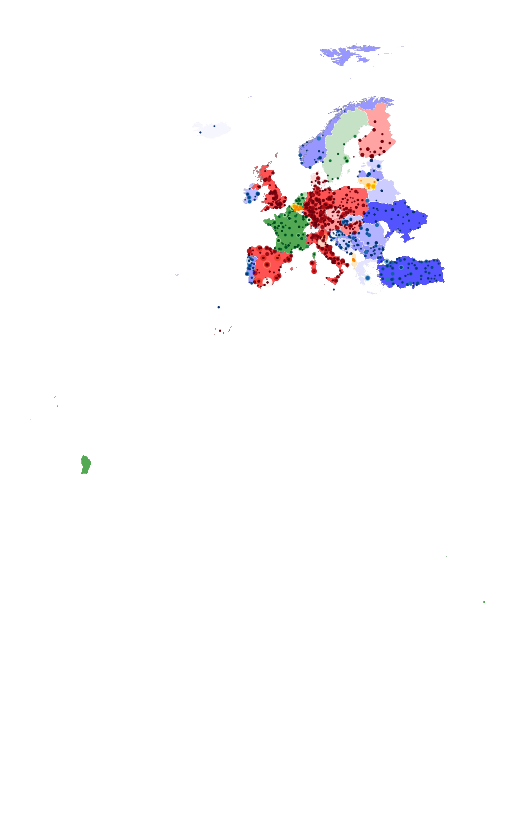

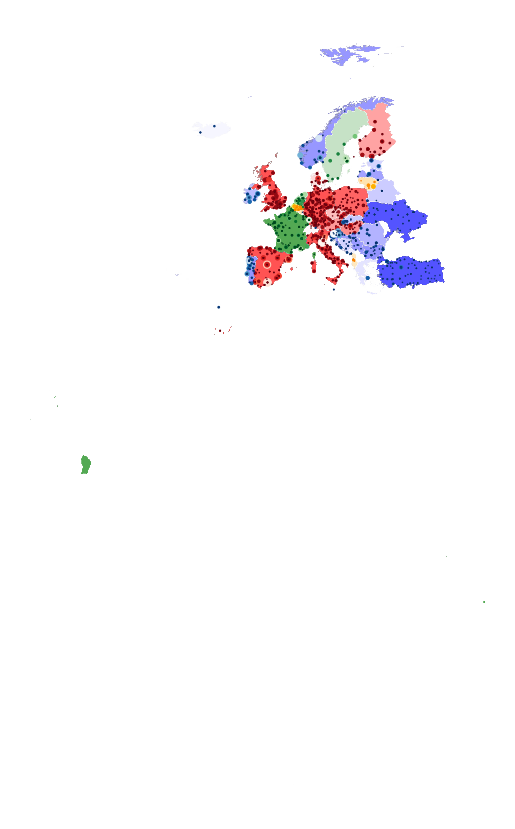

In [110]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'grey']
cmaps = ['Reds_r', 'Blues_r', 'Greens_r', 'Wistia_r', 'Purples_r', 'Greys_r']

fig, ax = plt.subplots(figsize=(20,15))

for c in range(4):
    temp_df = geo_scores[geo_scores['Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    temp_df.plot(ax=ax, edgecolor='0.5', linewidth=0.3, color=colors[c], alpha=0.01)
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['PageRank hub'],
                  cmap=cmaps[c])
ax.axis('off')

#plt.savefig('countries_communities & universities_hubs.png')

fig, ax = plt.subplots(figsize=(20,15))

for c in range(4):
    temp_df = geo_scores[geo_scores['Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    temp_df.plot(ax=ax, edgecolor='0.5', linewidth=0.3, color=colors[c], alpha=0.01)
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*10**4, c=temp_df['PageRank autority'],
                  cmap=cmaps[c])
ax.axis('off')

#plt.savefig('countries_communities & universities_authorities.png')

### Universities communities geographic plot

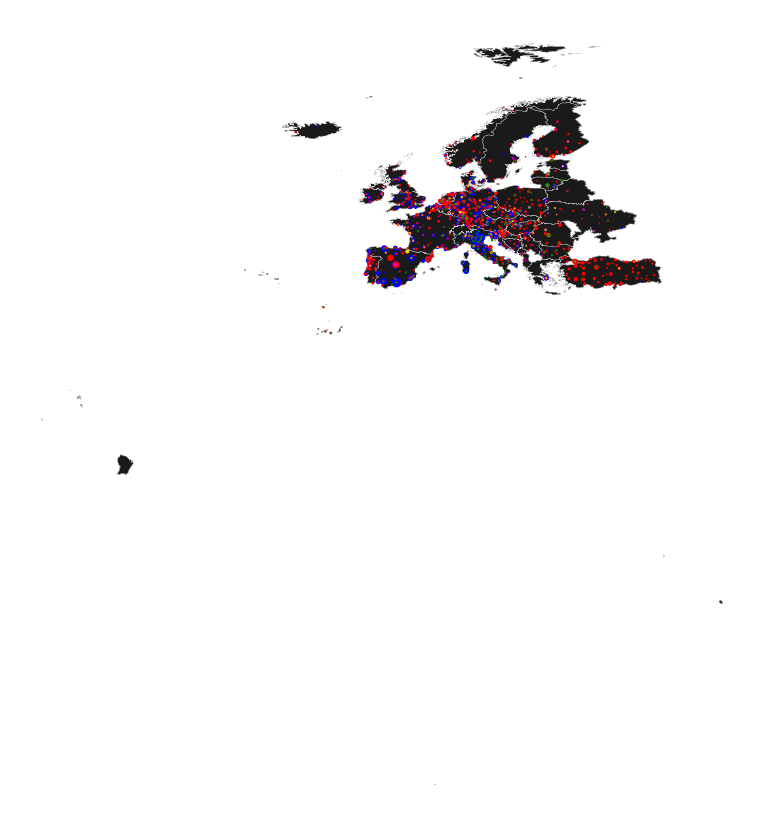

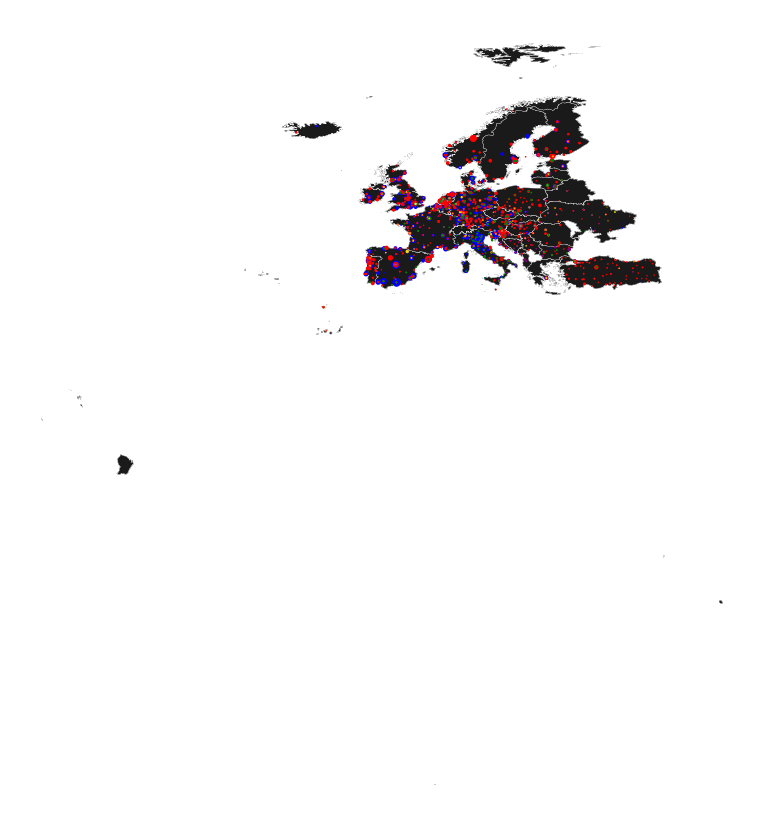

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'grey', 'gold', 'aqua', 'fuchsia', 'pink', 'yellow', 'salmon', 
          'khaki', 'brown', 'lime', 'skyblue', 'peachpuff', 'ivory', 'powderblue', 'rosybrown', 'royalblue', 
          'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue',
          'slategray', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet',
          'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen', 'lightgreen', 'lightgray', 'lightpink', 'lightsalmon', 
          'lightseagreen', 'lightskyblue', 'lightslategray']

geo_plt = geo_scores.copy()
# dropping all communities containing number of universities lower or equal than 2
for c in range(max(geo_plt['uni_Community'])):
    if geo_plt[geo_plt['uni_Community'] == c].shape[0] <= 2:
        geo_plt = geo_plt[geo_plt['uni_Community'] != c]
geo_plt = gpd.GeoDataFrame(geo_plt, geometry='geometry')

# universities sized on PageRank hub score
fig, ax = plt.subplots(figsize=(20,15))

geo_plt.plot(ax=ax, edgecolor='1', linewidth=0.3, color='0.1')

# sns.scatterplot(x='lng', y='lat', data=geo_plt, hue='uni_Community', legend=False, ax=ax, size=geo_plt['PageRank hub']*10**4)
# ax.scatter(x=geo_plt['lng'], y=geo_plt['lat'], s=geo_plt['PageRank hub']*10**4, c=geo_plt['uni_Community'], cmap='jet')

for c in list(geo_plt['uni_Community'].unique()):
    temp_df = geo_plt[geo_plt['uni_Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['uni_Community'], cmap='Pastel1')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, cmap='Pastel1')
    # ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, c=temp_df['uni_Community'])
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank hub']*10**4, color=colors[c])
ax.axis('off')

plt.savefig('universities_communities_hubs.png')

# universities sized on PageRank authority score
fig, ax = plt.subplots(figsize=(20,15))

geo_plt.plot(ax=ax, edgecolor='1', linewidth=0.3, color='0.1')

for c in list(geo_plt['uni_Community'].unique()):
    temp_df = geo_plt[geo_plt['uni_Community'] == c].copy()
    temp_df = gpd.GeoDataFrame(temp_df, geometry = 'geometry')
    ax.scatter(x=temp_df['lng'], y=temp_df['lat'], s=temp_df['PageRank autority']*10**4, color=colors[c])
ax.axis('off')

plt.savefig('universities_communities_authorities.png')

### Robustness

In [ ]:
#attack: removing hubs first
nodes_byhub = scores.sort_values('PageRank hub', ascending=False)['NodeID']
indices = list(nodes_byhub)
uni_df = mobility_df.copy()
GC_frac_a = [1]
for node in indices:
    uni_df = uni_df.loc[(uni_df['sourceID'] != node) & (uni_df['targetID'] != node)]
    temp_serie = uni_df.groupby(['sourceID', 'targetID']).sum()
    row = np.array(temp_serie.index.get_level_values(1).tolist())
    col = np.array(temp_serie.index.get_level_values(0).tolist())
    val = temp_serie.values
    temp_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
    GC_frac_a.append(ns.fraction_in_giant(temp_adj))


In [ ]:
#random node removal
import random
#10 by 10, with average over 10 trials each time
intervals = list(range(10, len(nodes_byhub+1), 10))
uni_df = mobility_df.copy()
GC_frac_r = [1]
for i in intervals:
    i_GC_frac = []
    for j in range(10):
        removed = random.sample(indices, i)
        temp_df = uni_df.loc[~(uni_df['sourceID'].isin(removed) | (uni_df['targetID'].isin(removed)))]
        temp_serie = temp_df.groupby(['sourceID', 'targetID']).sum()
        row = np.array(temp_serie.index.get_level_values(1).tolist())
        col = np.array(temp_serie.index.get_level_values(0).tolist())
        val = temp_serie.values
        temp_adj = sparse.csr_matrix((val.flatten(), (row, col)), shape=(nodes.size, nodes.size))
        i_GC_frac.append(ns.fraction_in_giant(temp_adj))
    GC_frac_r.append(sum(i_GC_frac)/10)

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot([i/len(nodes_byhub) for i in range(len(nodes_byhub)+1)], GC_frac_a, label='Targeted attack')
plt.plot([0]+[i/(len(intervals)*10) for i in intervals], GC_frac_r, 'r', label='Random node removal')
plt.plot([0,1], [1,0], 'g', label='linear reference')
plt.xlabel('Fraction of nodes in the giant component', size=14)
plt.ylabel('Fraction of removed nodes', size=14)
plt.title('Robustness', size=20)
plt.legend(fontsize=16)
plt.show()